In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/MauCFD/Project_1/main/project%201%20-%20Analyzing%20a%20Loyalty%20Program/Project_df.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [5]:
df1.head()

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.0
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.0
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.0
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.0
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.8


In [6]:
df2 = df1[['Client ID','Month','Year','Total Sales','Distributor']]
df2

,Client ID,Month,Year,Total Sales,Distributor
0,2,1,2018,51951,D5
1,2,2,2018,15301,D5
2,2,5,2018,19807,D5
3,2,6,2018,16916,D5
4,2,8,2018,88353,D5
...,...,...,...,...,...
14579,1371,11,2020,218149,D12
14580,1371,12,2020,119233,D12
14581,1372,10,2020,26834,D15
14582,1372,11,2020,35671,D15


In [7]:
month_number = df2.groupby(by=["Client ID"]).count()
agg_sales_customer = df2.groupby(by=["Client ID"]).sum()
customer_distributor = df2[['Client ID','Distributor']].drop_duplicates()

In [8]:
distributors = customer_distributor[['Distributor']].drop_duplicates()
distributors['Dist ID'] = np.arange(16).astype(int)
distributors.set_index('Distributor',inplace=True)
distributors

,Dist ID
Distributor,
D5,0
D13,1
D12,2
D10,3
D3,4
D8,5
D2,6
D11,7
D9,8


In [9]:
final_distributors = customer_distributor.join(distributors,on='Distributor',how='left')
final_distributors

,Client ID,Distributor,Dist ID
0,2,D5,0
24,4,D13,1
33,10,D12,2
65,12,D10,3
101,13,D13,1
...,...,...,...
14566,1369,D2,6
14571,1357,D13,1
14575,1370,D13,1
14578,1371,D12,2


In [10]:
month_number2 = month_number[['Month']]
month_number2.head()

,Month
Client ID,
2,24
4,9
10,32
12,36
13,8


In [11]:
new_df = final_distributors.join(agg_sales_customer, on='Client ID')
new_df.drop('Month',
  axis='columns', inplace=True)
new_df.drop('Year',
  axis='columns', inplace=True)
new_df

,Client ID,Distributor,Dist ID,Total Sales
0,2,D5,0,801212
24,4,D13,1,86690
33,10,D12,2,2434224
65,12,D10,3,12948576
101,13,D13,1,495714
...,...,...,...,...
14566,1369,D2,6,74489
14571,1357,D13,1,13226
14575,1370,D13,1,95839
14578,1371,D12,2,614375


In [17]:
final_df = new_df.join(month_number2, on='Client ID')
final_df['Average Monthly Sales']= final_df['Total Sales']/final_df['Month']
final_df

,Client ID,Distributor,Dist ID,Total Sales,Month,Average Monthly Sales
0,2,D5,0,801212,24,33383.833333
24,4,D13,1,86690,9,9632.222222
33,10,D12,2,2434224,32,76069.500000
65,12,D10,3,12948576,36,359682.666667
101,13,D13,1,495714,8,61964.250000
...,...,...,...,...,...,...
14566,1369,D2,6,74489,5,14897.800000
14571,1357,D13,1,13226,4,3306.500000
14575,1370,D13,1,95839,3,31946.333333
14578,1371,D12,2,614375,3,204791.666667


# Customer Cluster Analysis (avg sales vs total sales)

In [31]:
x = final_df.iloc[:, [3,5]].values

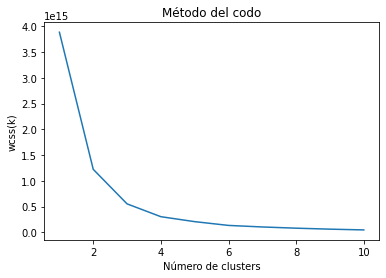

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("wcss(k)")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

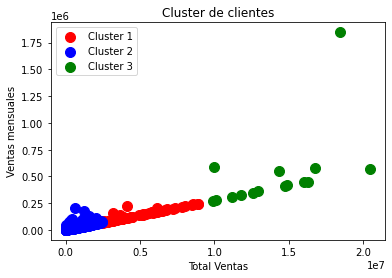

In [34]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s= 100, c= "red", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s= 100, c= "blue", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s= 100, c= "green", label = "Cluster 3")
plt.title("Cluster de clientes")
plt.xlabel("Total Ventas")
plt.ylabel("Ventas mensuales")
plt.legend()
#plt.savefig('6Cl_vtot_vmens', dpi=None, facecolor='w', edgecolor='w',
 #      orientation='portrait', format=None,
  #    transparent=False, bbox_inches=None, pad_inches=0.1,
   #  metadata=None)
plt.show() 

# Dendogram

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


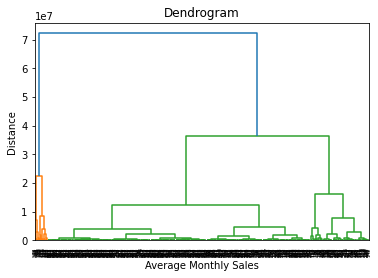

In [26]:
dendrogram = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Average Monthly Sales")
plt.ylabel("Distance") 
plt.savefig('Dendogram', dpi=None, facecolor='w', edgecolor='w',
 orientation='portrait', format=None,
     transparent=False, bbox_inches=None, pad_inches=0.1,
     metadata=None)
plt.show()

In [24]:
w = final_df.iloc[:,2].values

In [40]:
w

array([ 0,  1,  2,  3,  1,  0,  4,  5,  1,  0,  6,  0,  1,  1,  6,  1,  7,
        7,  5,  1,  5,  3,  3,  3,  3,  3,  6,  0,  3,  4,  0,  0,  6,  0,
        6,  3,  0,  3,  6,  1,  6,  8,  6,  6,  6,  6,  5,  1,  5,  5,  5,
        5,  1,  0,  6,  6,  1,  1,  5,  5,  5,  6,  8,  3,  6,  4,  4,  6,
        4,  0,  9,  9, 10,  5,  5,  6,  6,  6,  3,  3,  3,  3,  6,  0,  6,
        6,  1,  6,  3,  3,  8,  5,  6,  6,  8,  0,  5,  5,  6,  9,  4,  4,
        5,  4,  3,  6,  5,  8,  5,  8,  5,  6,  6,  5,  1,  6,  3,  5,  8,
        1,  5,  6,  9,  9,  6,  0,  8,  1,  3,  8,  1,  4, 11, 11,  6,  6,
        4,  4,  5,  0,  1,  6,  0,  5,  6,  5,  6,  1,  5,  6,  5,  5,  5,
        1,  9,  6,  9, 10,  0,  9,  1,  5,  5,  6,  6,  6,  6,  6,  6,  4,
        0,  6,  6,  6,  6,  4,  0,  4,  5,  5,  1, 12,  1, 11,  6,  6,  6,
        6,  1,  0,  9,  1,  9,  6,  5,  5,  3,  5,  6,  9,  3,  3,  1,  8,
        6,  8,  6,  1,  9,  6,  6,  6,  6,  4,  6,  4,  8,  5,  5,  3, 10,
        8,  8,  8,  9,  3

In [41]:
z = y_kmeans

In [42]:
z

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
f = w-z

array([-1,  0,  1,  3,  0,  0,  3,  4,  0, -1,  6, -1,  1,  0,  5,  0,  6,
        6,  4,  0,  4,  3,  3,  3,  2,  2,  5, -1,  3,  3, -1, -1,  5, -1,
        5,  2, -1,  2,  5,  0,  5,  7,  5,  5,  5,  6,  4,  0,  4,  4,  4,
        5,  0, -1,  5,  5,  1,  0,  4,  4,  4,  5,  7,  2,  5,  3,  4,  5,
        3,  0,  8,  9,  9,  4,  4,  5,  5,  5,  2,  2,  3,  2,  5, -1,  5,
        5,  0,  5,  3,  3,  7,  4,  5,  5,  7, -1,  4,  4,  5,  8,  3,  3,
        4,  3,  2,  5,  4,  7,  4,  7,  4,  5,  6,  4,  0,  5,  2,  4,  7,
        0,  4,  5,  8,  8,  5, -1,  7,  0,  2,  7,  0,  3, 10, 11,  6,  5,
        3,  3,  4, -1,  0,  5, -1,  4,  5,  4,  5,  0,  4,  5,  5,  4,  4,
        0,  8,  5,  8,  9,  0,  8,  1,  4,  4,  6,  5,  5,  5,  5,  5,  3,
       -1,  5,  5,  5,  5,  3, -1,  3,  4,  4,  0, 12,  0, 11,  5,  5,  5,
        5,  1, -1,  8,  0,  8,  5,  4,  4,  2,  4,  5,  8,  2,  2,  0,  7,
        5,  7,  5,  0,  8,  5,  5,  5,  5,  3,  5,  3,  7,  4,  4,  2,  9,
        7,  7,  7,  8,  2

In [45]:
from collections import Counter
print(Counter(w-z).keys())
print(Counter(w-z).values())

print(Counter(w-z))

dict_keys([-1, 0, 1, 3, 4, 6, 5, 2, 7, 8, 9, 10, 11, 12, 13, 14])
dict_values([36, 72, 9, 76, 101, 18, 170, 29, 24, 26, 7, 3, 10, 4, 3, 2])
Counter({5: 170, 4: 101, 3: 76, 0: 72, -1: 36, 2: 29, 8: 26, 7: 24, 6: 18, 11: 10, 1: 9, 9: 7, 12: 4, 10: 3, 13: 3, 14: 2})


In [49]:
print(Counter(w).keys())
print(Counter(w).values())

print(Counter(w))

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
dict_values([42, 70, 7, 36, 68, 103, 172, 13, 24, 27, 6, 5, 9, 4, 2, 2])
Counter({6: 172, 5: 103, 1: 70, 4: 68, 0: 42, 3: 36, 9: 27, 8: 24, 7: 13, 12: 9, 2: 7, 10: 6, 11: 5, 13: 4, 14: 2, 15: 2})


# Distributor Analysis

In [50]:
x = final_df.iloc[:, [2,3,5]].values

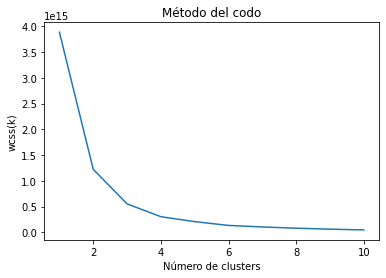

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("wcss(k)")
plt.show()

In [62]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

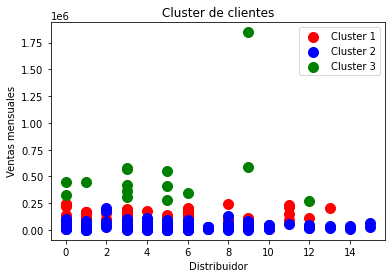

In [63]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,2], s= 100, c= "red", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,2], s= 100, c= "blue", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,2], s= 100, c= "green", label = "Cluster 3")
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,2], s= 100, c= "yellow", label = "Cluster 4")
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4,2], s= 100, c= "orange", label = "Cluster 5")
#plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5,2], s= 100, c= "black", label = "Cluster 6")



plt.title("Cluster de clientes")
plt.xlabel("Distribuidor")
plt.ylabel("Ventas mensuales")
plt.legend()
plt.savefig('3Cl_dist_vmens', dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', format=None,
    transparent=False, bbox_inches=None, pad_inches=0.1,
  metadata=None)
plt.show() 